### Decision Border Plot

In [15]:
from typing import Any
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier
from sklearn import utils, datasets

np.random.seed(42)

cmap_background = ListedColormap(["#FFAAAA", "#AAAAFF", "#AAFFAA"])

cmap_point = [
    "red",
    "blue",
    "green"
]

In [16]:
iris:utils.Bunch = datasets.load_iris()
x = iris.data
y = iris.target
num_samples = x.shape[0]
num_feats = x.shape[1]
num_classes = y.shape[0]
test_size = num_samples // 3
filtered_data = x[:, :2]

random_data_points = np.random.permutation(num_samples)

training_data_points = filtered_data[random_data_points[:-test_size]]
training_classes = y[random_data_points[:-test_size]]

test_data_points = filtered_data[random_data_points[-test_size:]]
test_classes = y[random_data_points[-test_size:]]

In [17]:
clf = KNeighborsClassifier(n_neighbors=8, weights="uniform")
clf.fit(training_data_points, training_classes)

KNeighborsClassifier(n_neighbors=8)

In [18]:
def  make_meshgrid(
    x: np.ndarray, 
    y: np.ndarray
) -> np.ndarray:
    step = 0.05
    offset = 0.1
    minX = np.min(x)
    maxX = np.max(x)
    x_axis = np.arange(start=minX-offset, stop=maxX+offset, step=step)
    minY = np.min(y)
    maxY = np.max(y)
    y_axis = np.arange(start=minY-offset, stop=maxY+offset, step=step)
    return np.meshgrid(x_axis, y_axis)
    

In [19]:
def plot_contours(
    ax: plt.Axes,
    clf: KNeighborsClassifier,
    x_grid: np.ndarray,
    y_grid: np.ndarray,
    **params: Any,
):
    data_points = np.vstack([x_grid.flatten(), y_grid.flatten()]).transpose()
    pred = clf.predict(data_points)
    pred = np.reshape(pred, newshape=(x_grid.shape))
    ax.contourf(x_grid, y_grid, pred, **params)
    

In [20]:
def plot_decision_border(clf: KNeighborsClassifier, training_data: np.ndarray, training_classes: np.ndarray, test_data: np.ndarray, test_classes: np.ndarray) -> None:
    figure, axes = plt.subplots()
    x0 = training_data[:, 0]
    x1 = training_data[:, 1]
    x_grid, y_grid = make_meshgrid(x0, x1)
    plot_contours(axes, clf, x_grid, y_grid, cmap=cmap_background, alpha=0.9)
    for idx, point in enumerate(training_data): # plot all the training data points
        plt.scatter(
            x=point[0],
            y=point[1],
            color=cmap_point[training_classes[idx]],
            s=15.0,
            marker="o"
        )
    for idx, point in enumerate(test_data): # plot all the test data points
        plt.scatter(
            x=point[0],
            y=point[1],
            color=cmap_point[test_classes[idx]],
            s=40.0,
            marker="*",
        )
    plt.show()
    

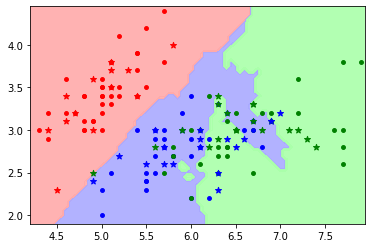

In [21]:
plot_decision_border(clf, training_data_points, training_classes, test_data_points, test_classes)